# Import libraries

In [57]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import LabelEncoder

# Load iris dataset

In [58]:
iris_data = load_iris()
df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
df['species'] = iris_data.target

In [59]:
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Step 1: EDA - head(), describe(), groupby()

In [60]:
# 1. Display first 5 rows
print("===== Head of Dataset =====")
print(df.head())

===== Head of Dataset =====
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


In [61]:
# 2. Summary statistics
print("\n===== Description =====")
print(df.describe())


===== Description =====
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


In [62]:
# 3. Group by species and calculate mean
print("\n===== Mean values by Species =====")
print(df.groupby('species').mean())


===== Mean values by Species =====
            sepal length (cm)  sepal width (cm)  petal length (cm)  \
species                                                              
setosa                  5.006             3.428              1.462   
versicolor              5.936             2.770              4.260   
virginica               6.588             2.974              5.552   

            petal width (cm)  
species                       
setosa                 0.246  
versicolor             1.326  
virginica              2.026  


# Step 2: Feature scaling

In [63]:
X = df.iloc[:, :-1]
y = df['species']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
scaled_df = pd.DataFrame(X_scaled, columns=iris_data.feature_names)
scaled_df['species'] = y.values

# Display before and after scaling
print("===== Original Feature Sample =====")
print(X.head())

print("\n===== Scaled Feature Sample =====")
print(scaled_df.head())

===== Original Feature Sample =====
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

===== Scaled Feature Sample =====
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0          -0.900681          1.019004          -1.340227         -1.315444   
1          -1.143017         -0.131979          -1.340227         -1.315444   
2          -1.385353          0.328414          -1.397064         -1.315444   
3          -1.506521          0.098217          -1.283389         -1.315444   
4          -1.021849          1.249201          -1.340227         -1.315444   

# Step 3: Training the K-NN model on the Training set

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,
                                                    test_size=0.2,
                                                    random_state=42)

knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

# Step 4: Making the Confusion Matrix & Predicting Accuracy Score

In [65]:
print("===== Confusion Matrix =====")
print(confusion_matrix(y_test, y_pred))


print("\n===== Model Accuracy =====")
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")

===== Confusion Matrix =====
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

===== Model Accuracy =====
Accuracy: 100.00%


# Step 5: Making Classification Report


In [66]:
print("\n===== Classification Report =====")
print(classification_report(y_test, y_pred))



===== Classification Report =====
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# Step 6: Comparing Error Rate with the K Value
# Step 7: Plot the error values against K values

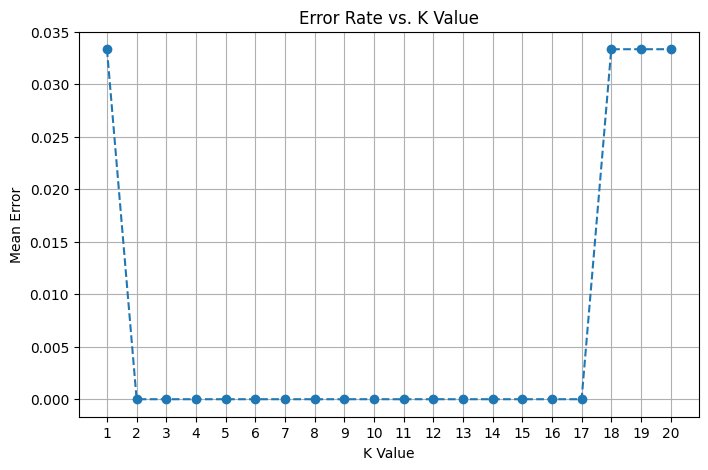

In [67]:
error_rate = []

for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    pred_k = knn.predict(X_test)
    error_rate.append(np.mean(pred_k != y_test))

plt.figure(figsize=(8, 5))
plt.plot(range(1, 21), error_rate, marker='o', linestyle='--')
plt.title('Error Rate vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.xticks(range(1, 21))
plt.grid(True)
plt.show()

# Step 8: Finding the Best K Value

In [68]:
best_k = error_rate.index(min(error_rate)) + 1
print(f" The Best K Value is: {best_k}")


 The Best K Value is: 2


In [69]:
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)
y_pred_best = best_knn.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

print("\n===== Confusion Matrix =====")
print(confusion_matrix(y_test, y_pred_best))

print("\n===== Classification Report =====")
print(classification_report(y_test, y_pred_best))

print(f"\n Model Accuracy with K={best_k}: {accuracy_score(y_test, y_pred_best)*100:.2f}%")


===== Confusion Matrix =====
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

===== Classification Report =====
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


 Model Accuracy with K=2: 100.00%


# Step 9: Visualizing Test Results of KNN

/tmp/ipython-input-3972369189.py:26: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_encoded == j, 0], X_set[y_encoded == j, 1],


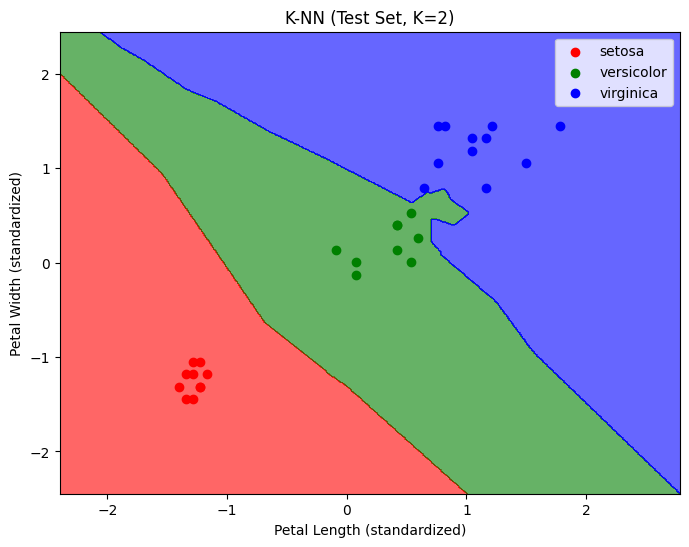

In [71]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_test)

X_set = X_test[:, [2, 3]]

best_knn_2d = KNeighborsClassifier(n_neighbors=best_k)
best_knn_2d.fit(X_train[:, [2, 3]], y_train)

X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
    np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01)
)

# Predict across the grid
Z = best_knn_2d.predict(np.array([X1.ravel(), X2.ravel()]).T)

Z_encoded = label_encoder.transform(Z)
Z_encoded = Z_encoded.reshape(X1.shape)

# Plot decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(X1, X2, Z_encoded, alpha=0.6, cmap=ListedColormap(('red', 'green', 'blue')))

# Scatter actual test points
for i, j in enumerate(np.unique(y_encoded)):
    plt.scatter(X_set[y_encoded == j, 0], X_set[y_encoded == j, 1],
                c=ListedColormap(('red', 'green', 'blue'))(i), label=label_encoder.classes_[j])

plt.title(f'K-NN (Test Set, K={best_k})')
plt.xlabel('Petal Length (standardized)')
plt.ylabel('Petal Width (standardized)')
plt.legend()
plt.show()